In [5]:
pip install scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


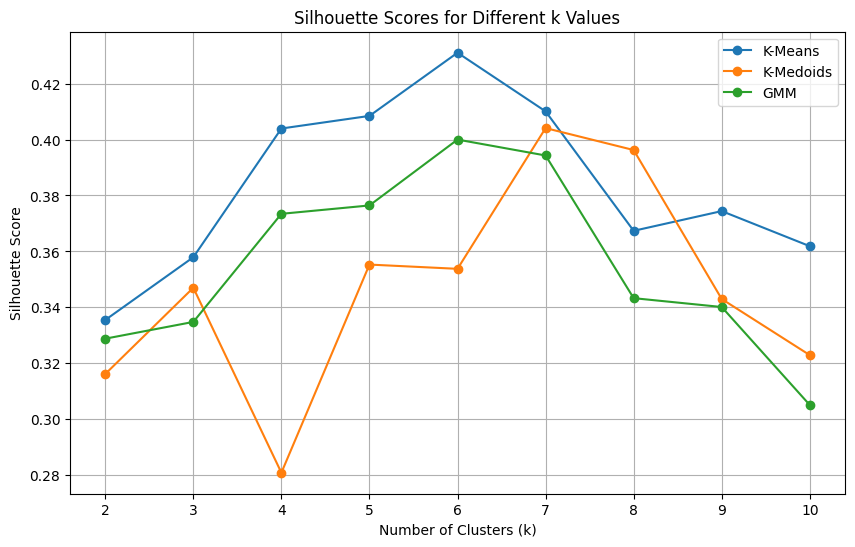

Saved the best model with a Silhouette Score of 0.43106526216603014 to 'best_clustering_model.pkl'.


['scaler.pkl']

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.mixture import GaussianMixture
from joblib import dump
import matplotlib.pyplot as plt

# Load the dataset
url = "https://gist.github.com/pravalliyaram/5c05f43d2351249927b8a3f3cc3e5ecf/raw/8bd6144a87988213693754baaa13fb204933282d/Mall_Customers.csv"
data = pd.read_csv(url)

# Selecting relevant features for clustering
features = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Range of k values to try
k_values = range(2, 11)
scores_kmeans = []
scores_kmedoids = []
scores_gmm = []
models_kmeans = []
models_kmedoids = []
models_gmm = []

# Grid search over k values
for k in k_values:
    # K-Means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(features_scaled)
    scores_kmeans.append(silhouette_score(features_scaled, kmeans_labels))
    models_kmeans.append(kmeans)

    # K-Medoids
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids_labels = kmedoids.fit_predict(features_scaled)
    scores_kmedoids.append(silhouette_score(features_scaled, kmedoids_labels))
    models_kmedoids.append(kmedoids)

    # Gaussian Mixture Model
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(features_scaled)
    scores_gmm.append(silhouette_score(features_scaled, gmm_labels))
    models_gmm.append(gmm)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores_kmeans, label='K-Means', marker='o')
plt.plot(k_values, scores_kmedoids, label='K-Medoids', marker='o')
plt.plot(k_values, scores_gmm, label='GMM', marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

# Determine the best overall model and save it
max_score, best_model = max(zip(scores_kmeans + scores_kmedoids + scores_gmm,
                                models_kmeans + models_kmedoids + models_gmm),
                            key=lambda x: x[0])

dump(best_model, f'best_clustering_model.pkl')
print(f"Saved the best model with a Silhouette Score of {max_score} to 'best_clustering_model.pkl'.")
joblib.dump(scaler, 'scaler.pkl')

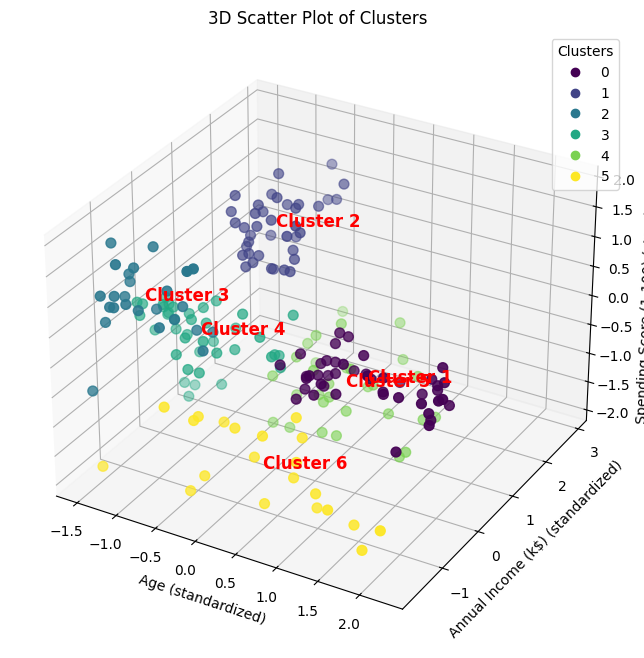

In [21]:
from joblib import dump, load
# Load the best model
best_model = load('best_clustering_model.pkl')

# Create a 3D scatter plot using the best model
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Predict the clusters using the best model on the scaled features
best_labels = best_model.fit_predict(features_scaled)

# Plotting the clusters
scatter = ax.scatter(features_scaled[:, 0], features_scaled[:, 1], features_scaled[:, 2], 
                     c=best_labels, cmap='viridis', label=best_labels, s=50)

# Label the clusters
centers = best_model.cluster_centers_ if hasattr(best_model, 'cluster_centers_') else best_model.means_
for i, c in enumerate(centers):
    ax.text(c[0], c[1], c[2], f'Cluster {i+1}', color='red', fontsize=12, weight='bold')

ax.set_xlabel('Age (standardized)')
ax.set_ylabel('Annual Income (k$) (standardized)')
ax.set_zlabel('Spending Score (1-100) (standardized)')
plt.title('3D Scatter Plot of Clusters')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()
